<a href="https://colab.research.google.com/github/tamdoancong/CSCE_5290_NLP_TamDoan/blob/main/TamDoan_ICE4_submitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ICE-4: Text Classification**

Text classification terminologies:

* **Training:** Set of documents, set of classes (x , y) where documents are hand-labeled or system-generated
* **Inference:** Predict the class that the new document belongs to when a new, unseen document is given


## **Task: Classifying News Articles using Naive Bayes**

In [ ]:
# import necessary library
import sys
import numpy
# to avoid NumPy's truncation of outputs when certain code blocks are generated
numpy.set_printoptions(threshold=sys.maxsize)


### **1. Create Dataset**


In [ ]:
# get data file from google drive
# !gdown --id 1JxCCH1rWjxVyVUJgR7_eesHubD6dNtHG

In [ ]:
# unzip data file
# !unzip bbc-updated.zip

In [ ]:
#read data to pandas data frame
import os
import pandas as pd
def file2string(fname):
  with open(fname, 'r', encoding="utf-8") as f:
    return f.read()
def read_files_folder(path,namefolder):
    folders = ([name for name in os.listdir(path) if os.path.splitext(name)[-1]!='.TXT'])  # get all directories
    print(f"List of all folders' name: { folders}")
    l1 = []
    l2=[]
    d={}
    df=pd.DataFrame(columns=['Text','Category'])
    text=[]
    category=[]
    for folder in folders:

        filenames=[fname for fname in os.listdir(path+folder)  if os.path.splitext(fname)[-1]=='.txt']
        l1.append(len(filenames))
        d[folder]=len(filenames)
        # print(filenames)
        print(f"List of all files' name in folder { folder} : {filenames}")
        print(f"Total files' in  { folder} folder : {len(filenames)}")

        for f in filenames:
            t=file2string(path+folder+'/'+f)
            text.append(t)
            category.append(folder)
        contents = os.listdir(os.path.join(path, folder))  # get list of contents
        # # print(len(contents))
        l2.append(len(contents))
    df['Text'] = text
    df['Category'] = category
    print(f"Total folders in {namefolder} folder  are: {len(folders)} ")
    print(f"Minimum number of  files in subfolders in {namefolder} folder: {min(l1)}")
    print(f"Maximum number of  files in subfolders in {namefolder}  folder: {max(l1)}")
    print(f"Total files in {namefolder} folder: {sum(l1)}")
    print(f"Total text files were appended into text list {len(text)} ")
    print(f"Total labels were appended into category list {len(category)} ")
    print(f"Total text files were read to pandas data frame  :  {df.shape[0]} ")
    print(f"Total instances were insert to pandas data frame  :  {len(df['Text'])}")
    print(f"Total instances were labeled in pandas data frame: {len(df['Category'])}")
    # print(text[0])
    # print(category[0])
    #print(df)
    print(f"The folders' name  and  total of files in each folder : \n {d} ")
    if l1==l2 and l1==df.shape[0]: print ( f"Everything is good :)")
    esle : print (f" Need to check the code again")
    return df,text,category

path='./bbc/'
df,text,category=read_files_folder(path,'bbc')

List of all folders' name: ['business', 'entertainment', 'tech', 'politics', 'sport']
List of all files' name in folder business : ['224.txt', '277.txt', '509.txt', '469.txt', '407.txt', '289.txt', '424.txt', '100.txt', '026.txt', '478.txt', '406.txt', '064.txt', '339.txt', '240.txt', '361.txt', '015.txt', '441.txt', '190.txt', '198.txt', '472.txt', '307.txt', '418.txt', '022.txt', '410.txt', '344.txt', '125.txt', '045.txt', '163.txt', '138.txt', '118.txt', '471.txt', '456.txt', '135.txt', '001.txt', '103.txt', '084.txt', '239.txt', '404.txt', '206.txt', '116.txt', '352.txt', '029.txt', '120.txt', '398.txt', '380.txt', '024.txt', '059.txt', '385.txt', '332.txt', '429.txt', '495.txt', '303.txt', '300.txt', '261.txt', '462.txt', '245.txt', '080.txt', '057.txt', '192.txt', '453.txt', '375.txt', '481.txt', '238.txt', '291.txt', '075.txt', '435.txt', '292.txt', '234.txt', '390.txt', '262.txt', '147.txt', '158.txt', '232.txt', '069.txt', '151.txt', '223.txt', '082.txt', '014.txt', '130.txt',

In [ ]:
df

,Text,Category
0,Man Utd to open books to Glazer\n\nManchester ...,business
1,Turkey turns on the economic charm\n\nThree ye...,business
2,Euro firms miss out on optimism\n\nMore than 9...,business
3,IMF agrees fresh Turkey funding\n\nTurkey has ...,business
4,India's Deccan gets more planes\n\nAir Deccan ...,business
...,...,...
2219,Wenger signs new deal\n\nArsenal manager Arsen...,sport
2220,Robinson answers critics\n\nEngland captain Ja...,sport
2221,Man Utd stroll to Cup win\n\nWayne Rooney made...,sport
2222,Spain coach faces racism inquiry\n\nSpain's Fo...,sport


In [ ]:
 text[0]

'Man Utd to open books to Glazer\n\nManchester United\'s board has agreed to give US tycoon Malcolm Glazer access to its books.\n\nEarlier this month, Mr Glazer presented the board with detailed proposals on an offer to buy the football club. In a statement, the club said it would allow Mr Glazer "limited due diligence" to give him the opportunity to take the proposal on to a formal bid. But it said it continued to oppose Mr Glazer\'s plans, calling his assumptions "aggressive" and his plan "damaging". Many of Manchester United\'s supporters own shares in the club, and the fan-based group Shareholders United is strongly opposed to any takeover by Mr Glazer. About 300 fans protested outside the Old Trafford ground two days ago.\n\nRival local club Manchester City has pleaded with visiting fans not to protest inside its ground when the two teams play a televised match on Sunday.\n\nManchester United\'s response comes as little surprise, as the board made clear. "Any board has a responsib

In [ ]:
category[0]

'business'

In [ ]:
df['Text'][0]

'Man Utd to open books to Glazer\n\nManchester United\'s board has agreed to give US tycoon Malcolm Glazer access to its books.\n\nEarlier this month, Mr Glazer presented the board with detailed proposals on an offer to buy the football club. In a statement, the club said it would allow Mr Glazer "limited due diligence" to give him the opportunity to take the proposal on to a formal bid. But it said it continued to oppose Mr Glazer\'s plans, calling his assumptions "aggressive" and his plan "damaging". Many of Manchester United\'s supporters own shares in the club, and the fan-based group Shareholders United is strongly opposed to any takeover by Mr Glazer. About 300 fans protested outside the Old Trafford ground two days ago.\n\nRival local club Manchester City has pleaded with visiting fans not to protest inside its ground when the two teams play a televised match on Sunday.\n\nManchester United\'s response comes as little surprise, as the board made clear. "Any board has a responsib

In [ ]:
df['Category'][0]

'business'

In [ ]:
df.size

4448

In [ ]:
df.shape

(2224, 2)

In [ ]:
df.head(10)

,Text,Category
0,Man Utd to open books to Glazer\n\nManchester ...,business
1,Turkey turns on the economic charm\n\nThree ye...,business
2,Euro firms miss out on optimism\n\nMore than 9...,business
3,IMF agrees fresh Turkey funding\n\nTurkey has ...,business
4,India's Deccan gets more planes\n\nAir Deccan ...,business
5,UK economy facing 'major risks'\n\nThe UK manu...,business
6,EU-US seeking deal on air dispute\n\nThe EU an...,business
7,Ebbers denies WorldCom fraud\n\nFormer WorldCo...,business
8,Safety alert as GM recalls cars\n\nThe world's...,business
9,Egypt and Israel seal trade deal\n\nIn a sign ...,business


In [ ]:
# split data into train and test set
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=.3,random_state=237)

In [ ]:
train

,Text,Category
2124,Vickery upbeat about arm injury\n\nEngland pro...,sport
1723,Clijsters hope on Aussie Open\n\nKim Clijsters...,sport
712,"Hendrix guitar fetches £100,000\n\nA much-love...",entertainment
485,US economy still growing says Fed\n\nMost area...,business
171,Stock market eyes Japan recovery\n\nJapanese s...,business
...,...,...
1834,Clyde 0-5 Celtic\n\nCeltic brushed aside Clyde...,sport
1672,Lib Dems' new election PR chief\n\nThe Lib Dem...,politics
1283,Microsoft makes anti-piracy move\n\nMicrosoft ...,tech
834,Hoffman hits out over modern film\n\nHollywood...,entertainment


In [ ]:
train.shape

(1556, 2)

In [ ]:
train['Text'][2124]

'Vickery upbeat about arm injury\n\nEngland prop Phil Vickery is staying positive despite a broken arm ruling him out of the RBS Six Nations.\n\nThe 28-year-old fractured the radius in his right forearm during Gloucester\'s 17-16 win over Bath on Saturday. He will undergo an operation on Monday and is expected to be out for at least six weeks. He said: "This isn\'t an injury that will stop me from working hard on the fitness elements and being around the lads." He added: "I\'ve got the operation this afternoon and I could be back doing fitness work after a week." "As frustrating as it is, I\'ve got to be positive."\n\nAfter the game, Vickery spoke with Bath prop David Barnes, who also broke his arm recently. "I had a chat with David Barnes and it looks like a similar injury to him," he said. "He said he had the operation and he was back running after a week. "There\'s no doubt that I\'m going to get involved and be around this place as soon as I can after the operation." Gloucester dir

In [ ]:
train['Category'][2124]

'sport'

In [ ]:
test['Text'][225]

'Yangtze Electric\'s profits double\n\nYangtze Electric Power, the operator of China\'s Three Gorges Dam, has said its profits more than doubled in 2004.\n\nThe firm has benefited from increased demand for electricity at a time when power shortages have hit cities and provinces across the country. As a hydroelectric-power generator it has not been hurt by higher coal costs. Net income jumped to 3bn yuan in 2004 ($365m; £190m), compared with 1.4bn yuan in 2003. Sales surged to 6.2bn yuan, from 3bn yuan a year earlier. The figures topped analysts expectations, even though the rate of growth has slowed from 2003. Analysts forecast that it is likely to decline further this year to a rate of expansion of closer to 20%.\n\nYangtze Electric has been expanding its output to meet demand driven by China\'s booming economy. The government has delayed the building of a number of power plants in an effort to rein in growth amid concerns that the economy may overheat. That has led to an energy crunc

In [ ]:
test['Category'][225]

'business'

### **2. Feature Extraction (Prepare Inputs)**

**Question 1(a): Given the vocabulary *V*, what is the corresponding BoW representation for sentence *S* using the word absence/presence measure?**

***V: { fishing, likes, at, too, Beth, family, campfire, Adam, beach, the, vacation, lake, enjoys }***

***S: "Adam enjoys fishing at the lake. Beth likes fishing too."***

**Instructions:** This question is to be answered without using any code. **DO NOT** use scikit-learn or other NLP libraries to answer this question.

**Answer for Question 1(a):** <br>
***V: { fishing, likes, at, too, Beth, family, campfire, Adam, beach, the, vacation, lake, enjoys }***

***S: "Adam enjoys fishing at the lake. Beth likes fishing too."***<br>
The corresponding BoW representation for sentence S using the word absence/presence measure: <br> 
 ***BoW_S1a={ fishing: 1, likes:1, at:1, too:1, Beth:1, family:0, campfire:0, Adam:1, beach : 0, the:1, vacation:0, lake:1, enjoys:1 }***

**Question 1(b): Given the same vocabulary *V*, what is the corresponding BoW representation for sentence *S* using the term frequency measure?**

***V: { fishing, likes, at, too, Beth, family, campfire, Adam, beach, the, vacation, lake, enjoys }***

***S: "Adam enjoys fishing at the lake. Beth likes fishing too."***

**Instructions:** This question is to be answered without using any code and/or scikit-learn. **DO NOT** use scikit-learn or other NLP libraries to answer this question.

**Answer for Question 1(b):** <br>
***V: { fishing, likes, at, too, Beth, family, campfire, Adam, beach, the, vacation, lake, enjoys }***

***S: "Adam enjoys fishing at the lake. Beth likes fishing too."***<br>
The corresponding BoW representation for sentence S using the term frequency measure:<br>
***BoW_S1b={ fishing: 2, likes:1, at:1, too:1, Beth:1, family:0, campfire:0, Adam:1, beach:0, the:1, vacation:0, lake:1, enjoys:1 }***

**Question 2: Given the same vocabulary (as in Questions 1a. and 1b.), write the BoW representations for the following sentence S using both measures (presence/absence of words and term frequency information):**

***S: He wanted to bring peace to his kingdom but his enemies killed him.***

**Instructions:** This question is to be answered without using any code and/or scikit-learn.  **DO NOT** use scikit-learn or other NLP libraries to answer this question.

**Answer for Question 2:** <br>
***V: { fishing, likes, at, too, Beth, family, campfire, Adam, beach, the, vacation, lake, enjoys }***

***S: He wanted to bring peace to his kingdom but his enemies killed him.***<br>
The corresponding BoW representation for sentence S in question 2 using both measures (presence/absence of words and term frequency information):<br>
***BoW_S2={ fishing: 0, likes:0, at:0, too:0, Beth:0, family:0, campfire:0, Adam:0, beach:0, the:0, vacation:0, lake:0, enjoys:0 }***<br>
Thus, all the words in the given sentence are not in the given vocabulary list.

**Question 3: Consider the following code snippet:**

```
bow_vect = CountVectorizer()

some_corpus = [
     'It is raining heavily today.',
     'And the weather is unpredictable.',
     'Weather forecast for tomorrow says sunny.',
     'Is it raining heavily today?',
]

res_data = bow_vect.fit_transform(some_corpus)

bow_vect.get_feature_names())
>>> ['and', 'for', 'forecast', 'heavily', 'is', 'it', 'raining', 'says', 'sunny', 'the', 'today', 'tomorrow', 'unpredictable', 'weather']


res_data.toarray()
>>> array([ [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0],
            [1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1],
            [0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1],
            [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0] ])

```

**In the above snippet, '>>>' indicates the output corresponding to the previous line of code. Something interesting is happening after the sentences are converted to their BoW representations. Can you identify? After you identify, provide your observation about what might be impacted/affected when using the encoded representations as shown in the above code snippet.**

**Instructions:** You do not have to run the above code again since the outputs that you would need to answer the corresponding question is already provided.


**Answer for Question 3:** <br>
The sequence of words is important .  These two sentences “It is raining heavily today.” and “Is it raining heavily today?” have totally different meaning. However, BoW represents them with only one vector [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0].

**Question 4: For the given task, use the term frequency measure to compute the BoW representations for the text documents in the modified version of the BBC dataset.**

**Instructions:** 
* This question is to be answered by using scikit-learn (similar to what was demonstrated in the tutorial section)
* Create BoW representations for train and test sets.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
#  create BoW representation the training set
X_train = vector.fit_transform(train['Text'])
X_train=X_train.toarray()
train_vocabulary=vector.get_feature_names()
print(f" The number of instances in the BBC train set are represented : {len(X_train)}")
print(f" The length of each vector which represent each instance in the BBC train set is : {len(X_train[1])}")
print(f" Total vocabulary in the BBC train set is : {len(train_vocabulary)}")
print(f"shape of X_train :{X_train.shape}")


 The number of instances in the BBC train set are represented : 1556
 The length of each vector which represent each instance in the BBC train set is : 25293
 Total vocabulary in the BBC train set is : 25293
shape of X_train :(1556, 25293)


In [ ]:
#  create BoW representation for the test set using the training vocabulary
X_test = vector.transform(test['Text'])
X_test=X_test.toarray()
# test_vocabulary=vector.get_feature_names()
print(f" The number of instances in the BBC test set are represented : {len(X_test)}")
print(f" The length of each vector which represent each instance in the BBC test set is : {len(X_test[1])}")
print(f" Total vocabulary in the BBC test set is : {len(test_vocabulary)}")
print(f"shape of X_train :{X_test.shape}")

 The number of instances in the BBC test set are represented : 668
 The length of each vector which represent each instance in the BBC test set is : 25293
 Total vocabulary in the BBC test set is : 17739
shape of X_train :(668, 25293)


### **3. Prepare Outputs/Labels**

**Instructions:**
* Check to see how the outputs are in the data
* If categories are non-numeric, then encode them as numeric labels (similar to what was discussed in the tutorial demonstration)
* You will have to perform encoding for targets in both train and test sets
* Make sure to perform the same encoding that was done for the targets in the training set when encoding the targets in the test set.

In [ ]:
Y_train=train['Category']
Y_train

2124            sport
1723            sport
712     entertainment
485          business
171          business
            ...      
1834            sport
1672         politics
1283             tech
834     entertainment
1855            sport
Name: Category, Length: 1556, dtype: object

In [ ]:
from sklearn import preprocessing
#fit train label into LabelEncoder()
enc1 = preprocessing.LabelEncoder()
enc1.fit(Y_train)
print(f"List of all categories: {list(enc1.classes_)}")



List of all categories: ['business', 'entertainment', 'politics', 'sport', 'tech']


In [ ]:
enc1.inverse_transform([0,1,2,3,4])

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [ ]:
d={}
v=enc1.transform(['business', 'entertainment', 'politics', 'sport', 'tech'])
k=list(enc1.classes_)
for k1,v1 in zip(k,v):
  d[k1]=v1
d

{'business': 0, 'entertainment': 1, 'politics': 2, 'sport': 3, 'tech': 4}

In [ ]:
# encode the train label as numerical labels
Y_train_enc= enc1.transform(Y_train)
print(f"Y_train encoded labels: {Y_train_enc}")

Y_train encoded labels: [3 3 1 0 0 3 3 2 1 3 4 0 2 2 0 0 1 4 1 0 4 1 3 2 4 2 4 1 0 1 1 0 0 1 0 3 4
 3 0 4 2 4 3 0 1 3 1 2 2 2 2 4 4 2 3 3 2 1 4 2 1 4 4 2 3 2 4 2 1 2 2 3 0 4
 3 0 3 3 0 3 3 3 3 2 4 4 2 0 3 0 4 1 0 2 2 3 3 0 3 1 1 2 0 4 0 1 0 2 2 4 4
 1 0 4 3 3 1 0 3 0 2 2 0 3 1 0 3 4 2 2 2 2 3 1 3 3 3 2 3 2 2 1 3 1 4 1 4 1
 0 4 3 3 0 3 3 2 1 2 3 4 0 2 0 0 4 4 0 3 1 4 0 3 3 2 0 3 3 0 2 3 3 4 2 1 4
 4 1 4 3 2 2 0 4 4 3 2 0 1 1 0 1 3 2 0 4 2 0 4 1 3 0 1 0 1 0 2 3 0 4 2 3 0
 2 0 4 0 1 4 1 2 3 0 4 0 0 2 0 0 0 4 0 1 3 3 1 3 4 2 0 3 3 4 4 1 1 1 4 0 2
 1 2 0 0 2 1 2 2 3 3 0 4 4 3 1 3 0 2 3 0 4 4 4 2 0 0 0 0 4 1 3 3 4 3 1 4 1
 0 3 2 3 4 3 4 3 1 3 1 2 3 2 3 0 1 4 2 4 1 1 2 3 0 0 2 0 0 3 4 0 4 4 0 4 2
 0 4 4 0 2 2 2 0 2 3 4 3 0 1 2 2 2 2 0 3 0 0 1 3 1 3 4 1 4 2 4 2 0 2 0 0 1
 0 2 4 4 4 0 4 3 3 4 0 3 0 3 1 1 0 3 2 2 3 0 4 0 0 0 3 2 3 3 0 1 2 1 3 4 4
 0 1 2 1 0 2 3 2 3 2 4 0 1 0 4 2 1 4 2 0 2 2 1 0 1 0 1 3 0 4 1 1 1 0 0 3 0
 3 2 0 4 2 4 2 1 1 0 3 0 3 2 1 1 2 1 4 3 0 0 0 0 3 3 3 1 1 2 2 3 1 4 3 0 3
 

In [ ]:
Y_test=test['Category']
Y_test

225          business
2081            sport
1305         politics
1374         politics
1139             tech
            ...      
1731            sport
1930            sport
1848            sport
836     entertainment
441          business
Name: Category, Length: 668, dtype: object

In [ ]:
#fit test label into LabelEncoder()
enc2 = preprocessing.LabelEncoder()
enc2.fit(Y_test)
print(f"Unique categories: {list(enc2.classes_)}")


Unique categories: ['business', 'entertainment', 'politics', 'sport', 'tech']


In [ ]:
# encode the test label  as numerical labels
Y_test_enc= enc2.transform(Y_test)
print(f"Y_test encoded labels: {Y_test_enc}")

Y_test encoded labels: [0 3 2 2 4 3 3 2 3 0 0 3 4 4 3 0 2 0 4 3 3 3 4 2 4 3 0 4 0 2 0 4 1 0 2 3 2
 0 4 0 1 3 3 4 3 4 3 2 0 1 3 3 2 4 2 0 1 1 0 2 3 2 3 3 0 1 3 2 1 3 2 1 4 0
 0 4 2 0 3 3 1 3 0 3 4 1 3 0 4 3 1 1 1 4 4 3 2 3 0 3 0 4 4 4 4 0 4 0 3 3 4
 3 1 4 4 2 4 0 1 1 4 2 1 3 3 3 1 3 2 2 4 1 0 3 0 0 0 4 3 3 1 0 4 0 0 0 3 1
 4 4 2 2 3 3 0 3 2 0 4 2 3 2 0 0 1 4 2 2 4 4 1 2 2 4 3 2 3 1 0 2 1 0 2 3 0
 0 4 2 4 3 2 3 4 1 2 3 0 0 1 2 2 2 2 2 3 3 3 0 3 3 0 0 3 3 1 3 0 2 4 0 2 2
 2 3 0 0 1 2 0 3 3 4 0 0 4 4 1 0 3 3 0 3 3 4 0 1 1 1 4 0 3 1 3 0 4 1 3 3 0
 4 0 4 3 3 2 3 2 1 2 4 2 2 3 3 3 1 3 0 2 4 0 2 2 4 4 0 1 2 3 4 1 2 4 2 3 4
 3 0 2 4 4 2 3 3 2 1 1 1 3 3 0 3 1 2 2 3 1 0 2 3 0 1 4 3 1 0 3 4 0 3 3 3 2
 0 4 3 4 2 3 4 1 2 0 1 3 3 1 1 3 4 0 3 1 0 1 1 0 1 2 3 2 1 0 1 4 4 4 4 0 4
 1 3 0 4 0 1 2 2 2 3 2 0 0 1 1 4 3 2 2 3 4 4 4 2 1 1 3 3 0 3 4 0 1 3 3 2 0
 2 0 4 3 3 1 3 1 3 3 0 2 1 4 0 0 0 3 4 2 0 3 1 1 0 3 0 3 1 2 0 2 0 0 1 0 1
 1 3 1 4 3 3 3 0 2 3 4 0 2 1 2 0 0 0 0 4 4 1 0 0 4 0 2 3 0 1 0 3 1 4 3 0 4
 1

### **4. Model Training and Evaluation**

**Question 5: Train a Naive Bayes model using the training set. Once the model is trained, apply the model on the test set and evaluate the performance of the model by calculating accuracy and generating the confusion matrix.**

**Instructions:**
* Again, this section is very similar to what was demonstrated in the tutorial section.
* Create a Multinomial Naive Bayes classifier (model).
* Train the model using the data in the training set.
* Apply the model on the test set data to get the predictions made by the model.
* Once the predictions are generated, use ```sklearn.metrics.accuracy_score()``` and ```sklearn.metrics.confusion_matrix()``` as metrics to report your model performance. 

In [ ]:
Y_train_enc

array([3, 3, 1, 0, 0, 3, 3, 2, 1, 3, 4, 0, 2, 2, 0, 0, 1, 4, 1, 0, 4, 1,
       3, 2, 4, 2, 4, 1, 0, 1, 1, 0, 0, 1, 0, 3, 4, 3, 0, 4, 2, 4, 3, 0,
       1, 3, 1, 2, 2, 2, 2, 4, 4, 2, 3, 3, 2, 1, 4, 2, 1, 4, 4, 2, 3, 2,
       4, 2, 1, 2, 2, 3, 0, 4, 3, 0, 3, 3, 0, 3, 3, 3, 3, 2, 4, 4, 2, 0,
       3, 0, 4, 1, 0, 2, 2, 3, 3, 0, 3, 1, 1, 2, 0, 4, 0, 1, 0, 2, 2, 4,
       4, 1, 0, 4, 3, 3, 1, 0, 3, 0, 2, 2, 0, 3, 1, 0, 3, 4, 2, 2, 2, 2,
       3, 1, 3, 3, 3, 2, 3, 2, 2, 1, 3, 1, 4, 1, 4, 1, 0, 4, 3, 3, 0, 3,
       3, 2, 1, 2, 3, 4, 0, 2, 0, 0, 4, 4, 0, 3, 1, 4, 0, 3, 3, 2, 0, 3,
       3, 0, 2, 3, 3, 4, 2, 1, 4, 4, 1, 4, 3, 2, 2, 0, 4, 4, 3, 2, 0, 1,
       1, 0, 1, 3, 2, 0, 4, 2, 0, 4, 1, 3, 0, 1, 0, 1, 0, 2, 3, 0, 4, 2,
       3, 0, 2, 0, 4, 0, 1, 4, 1, 2, 3, 0, 4, 0, 0, 2, 0, 0, 0, 4, 0, 1,
       3, 3, 1, 3, 4, 2, 0, 3, 3, 4, 4, 1, 1, 1, 4, 0, 2, 1, 2, 0, 0, 2,
       1, 2, 2, 3, 3, 0, 4, 4, 3, 1, 3, 0, 2, 3, 0, 4, 4, 4, 2, 0, 0, 0,
       0, 4, 1, 3, 3, 4, 3, 1, 4, 1, 0, 3, 2, 3, 4,

In [ ]:
#  BBC dataset is balance and the input is  represented as word vector counts. 
#Thus,Multinomial Naive Bayes model is suitable.
from sklearn.naive_bayes import MultinomialNB
MNB_model = MultinomialNB()
MNB_model.fit(X_train, Y_train_enc)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
X_train.shape

(1556, 25293)

In [ ]:
X_test.shape


(668, 25293)

In [ ]:
Y_predict=MNB_model.predict(X_test)
Y_predict

array([0, 3, 2, 2, 4, 3, 3, 2, 3, 0, 0, 3, 4, 4, 3, 0, 2, 0, 4, 3, 3, 3,
       4, 2, 4, 3, 4, 4, 0, 2, 0, 4, 0, 0, 0, 3, 2, 2, 4, 0, 1, 3, 3, 4,
       3, 4, 3, 2, 0, 1, 3, 3, 2, 4, 2, 0, 1, 1, 0, 2, 3, 2, 3, 3, 2, 1,
       3, 2, 1, 0, 2, 1, 4, 0, 4, 4, 2, 0, 3, 3, 1, 3, 0, 3, 4, 1, 3, 0,
       4, 3, 1, 1, 1, 4, 4, 3, 2, 3, 0, 3, 0, 4, 4, 4, 4, 0, 4, 0, 3, 3,
       4, 3, 1, 4, 4, 2, 4, 2, 1, 1, 4, 2, 1, 3, 3, 3, 1, 3, 2, 2, 4, 1,
       0, 3, 0, 0, 0, 4, 3, 3, 1, 0, 4, 0, 4, 0, 3, 4, 4, 4, 2, 2, 3, 3,
       0, 3, 2, 0, 4, 2, 3, 2, 0, 0, 1, 4, 2, 2, 4, 4, 1, 2, 2, 4, 3, 2,
       3, 1, 0, 2, 1, 0, 2, 3, 0, 0, 4, 2, 4, 3, 2, 3, 4, 1, 2, 3, 0, 0,
       1, 2, 2, 2, 2, 2, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 1, 3, 0, 2, 4, 1,
       2, 2, 2, 3, 0, 0, 4, 2, 0, 3, 3, 4, 0, 0, 4, 4, 1, 0, 3, 3, 0, 3,
       3, 4, 0, 1, 1, 1, 4, 0, 3, 4, 3, 0, 4, 1, 3, 3, 0, 4, 0, 4, 3, 3,
       2, 3, 2, 1, 2, 4, 2, 2, 3, 3, 3, 0, 3, 0, 2, 4, 0, 2, 2, 4, 4, 0,
       1, 2, 3, 4, 1, 2, 4, 2, 3, 4, 3, 0, 2, 4, 4,

In [ ]:
Y_test_enc

array([0, 3, 2, 2, 4, 3, 3, 2, 3, 0, 0, 3, 4, 4, 3, 0, 2, 0, 4, 3, 3, 3,
       4, 2, 4, 3, 0, 4, 0, 2, 0, 4, 1, 0, 2, 3, 2, 0, 4, 0, 1, 3, 3, 4,
       3, 4, 3, 2, 0, 1, 3, 3, 2, 4, 2, 0, 1, 1, 0, 2, 3, 2, 3, 3, 0, 1,
       3, 2, 1, 3, 2, 1, 4, 0, 0, 4, 2, 0, 3, 3, 1, 3, 0, 3, 4, 1, 3, 0,
       4, 3, 1, 1, 1, 4, 4, 3, 2, 3, 0, 3, 0, 4, 4, 4, 4, 0, 4, 0, 3, 3,
       4, 3, 1, 4, 4, 2, 4, 0, 1, 1, 4, 2, 1, 3, 3, 3, 1, 3, 2, 2, 4, 1,
       0, 3, 0, 0, 0, 4, 3, 3, 1, 0, 4, 0, 0, 0, 3, 1, 4, 4, 2, 2, 3, 3,
       0, 3, 2, 0, 4, 2, 3, 2, 0, 0, 1, 4, 2, 2, 4, 4, 1, 2, 2, 4, 3, 2,
       3, 1, 0, 2, 1, 0, 2, 3, 0, 0, 4, 2, 4, 3, 2, 3, 4, 1, 2, 3, 0, 0,
       1, 2, 2, 2, 2, 2, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 1, 3, 0, 2, 4, 0,
       2, 2, 2, 3, 0, 0, 1, 2, 0, 3, 3, 4, 0, 0, 4, 4, 1, 0, 3, 3, 0, 3,
       3, 4, 0, 1, 1, 1, 4, 0, 3, 1, 3, 0, 4, 1, 3, 3, 0, 4, 0, 4, 3, 3,
       2, 3, 2, 1, 2, 4, 2, 2, 3, 3, 3, 1, 3, 0, 2, 4, 0, 2, 2, 4, 4, 0,
       1, 2, 3, 4, 1, 2, 4, 2, 3, 4, 3, 0, 2, 4, 4,

In [ ]:
# importing the metrics module from sklearn
from sklearn import metrics

# use the accuracy_score metric to calculate accuracy of the MNB_model

accuracy = metrics.accuracy_score(Y_test_enc, Y_predict)
accuracy

0.9580838323353293

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [ ]:
cm=confusion_matrix(Y_test_enc,Y_predict)
cm

array([[130,   1,   4,   0,   9],
       [  3, 101,   3,   0,   5],
       [  1,   0, 117,   0,   0],
       [  1,   0,   1, 170,   0],
       [  0,   0,   0,   0, 122]])

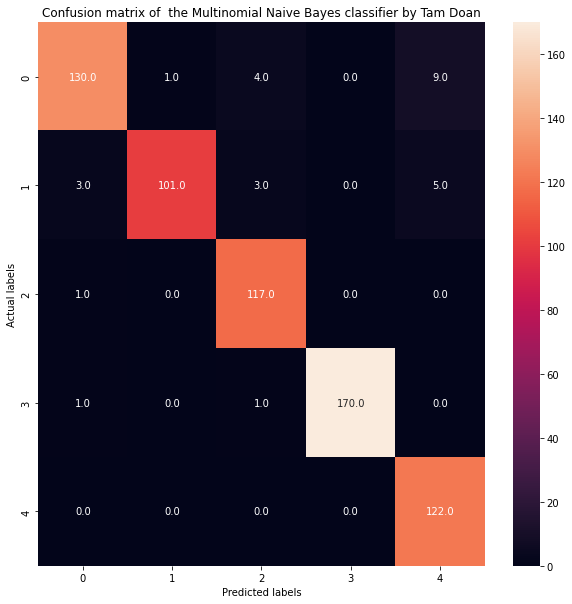

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
plt.title('Confusion matrix of  the Multinomial Naive Bayes classifier by Tam Doan')
sns.heatmap(cm,annot=True,fmt=".1f")
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.show()

In [ ]:
# use sklearn report 
rp=classification_report(Y_test_enc,Y_predict)
print(rp)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       144
           1       0.99      0.90      0.94       112
           2       0.94      0.99      0.96       118
           3       1.00      0.99      0.99       172
           4       0.90      1.00      0.95       122

    accuracy                           0.96       668
   macro avg       0.96      0.96      0.96       668
weighted avg       0.96      0.96      0.96       668



In [ ]:
report=classification_report(Y_test_enc,Y_predict,output_dict=True)
for i in range(3):
  report.popitem()
report
report = pd.DataFrame(report).transpose()
report

,precision,recall,f1-score,support
0,0.962963,0.902778,0.931900,144.0
1,0.990196,0.901786,0.943925,112.0
2,0.936000,0.991525,0.962963,118.0
3,1.000000,0.988372,0.994152,172.0
4,0.897059,1.000000,0.945736,122.0


In [ ]:
c=[]
for j in list(report.index):
  c.append(int(j))
c



[0, 1, 2, 3, 4]

In [ ]:
report[]

In [ ]:
# report_5=report.iloc[:5]

report_5['Category']=enc1.inverse_transform(c)
report_5=report_5[['Category','precision','recall','f1-score','support']]
report_5


,Category,precision,recall,f1-score,support
0,business,0.962963,0.902778,0.931900,144.0
1,entertainment,0.990196,0.901786,0.943925,112.0
2,politics,0.936000,0.991525,0.962963,118.0
3,sport,1.000000,0.988372,0.994152,172.0
4,tech,0.897059,1.000000,0.945736,122.0


### **Establishing a baseline model**

Baseline models are helpful for easy comparison of the models you build. These models are trained using simple heuristics or rules.

**Instructions:**
* All you have to do is run the following block of code. Report the accuracy of your model (the Naive Bayes one) in comparison to the baseline model created in the following code block

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
# choose 'most-frequent class' as the baseline method
baseline_model = DummyClassifier(strategy="most_frequent")

# fit the baseline model on the training data
baseline_model.fit(X_train, Y_train_enc)

# make predictions on the test data using the created baseline model
baseline_preds = baseline_model.predict(X_test)

# compute the accuracy of the baseline model
print(accuracy_score(Y_test_enc, baseline_preds))

0.2155688622754491
